1. Open the US Census Bureau Excel

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url="https://www2.census.gov/programs-surveys/popest/tables/2010-2020/state/totals/nst-est2020.xlsx"

df=pd.read_excel(url, header = 3)

2. Modify the data frame so that it only contains 51 rows, one for each state and the District of Columbia and change the colum names

In [2]:
#Cutting the original table to only display the 50 states and the DC
df_short= df.iloc[5:56]

#Renames the columns and reset the index to match the new table
df_states = df_short.rename(columns={'Unnamed: 0':'State','Estimates Base':'Estimates','April 1':'2020Apr',
                                     'July 1':'2020Jul'})
df_states.reset_index(inplace= True)
df_states.head()

,index,State,Census,Estimates,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020Apr,2020Jul
0,5,.Alabama,4779736.0,4780118.0,4785514.0,4799642.0,4816632.0,4831586.0,4843737.0,4854803.0,4866824.0,4877989.0,4891628.0,4907965.0,4920706.0,4921532.0
1,6,.Alaska,710231.0,710246.0,713982.0,722349.0,730810.0,737626.0,737075.0,738430.0,742575.0,740983.0,736624.0,733603.0,732074.0,731158.0
2,7,.Arizona,6392017.0,6392292.0,6407342.0,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0,6944767.0,7048088.0,7164228.0,7291843.0,7393900.0,7421401.0
3,8,.Arkansas,2915918.0,2916029.0,2921998.0,2941038.0,2952876.0,2960459.0,2968759.0,2979732.0,2991815.0,3003855.0,3012161.0,3020985.0,3029672.0,3030522.0
4,9,.California,37253956.0,37254522.0,37319550.0,37636311.0,37944551.0,38253768.0,38586706.0,38904296.0,39149186.0,39337785.0,39437463.0,39437610.0,39418894.0,39368078.0


3. Modify the data frame so that it only contains the following columns:  the state name and the population for each of the years from 2010 to 2019 

In [3]:
#Deletes the extra columns so only the information from 2010 to 2019 is on the Table
df_states.drop(['index','Census','Estimates','2020Apr','2020Jul'], axis=1, inplace=True)
df_states.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,.Alabama,4785514.0,4799642.0,4816632.0,4831586.0,4843737.0,4854803.0,4866824.0,4877989.0,4891628.0,4907965.0
1,.Alaska,713982.0,722349.0,730810.0,737626.0,737075.0,738430.0,742575.0,740983.0,736624.0,733603.0
2,.Arizona,6407342.0,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0,6944767.0,7048088.0,7164228.0,7291843.0
3,.Arkansas,2921998.0,2941038.0,2952876.0,2960459.0,2968759.0,2979732.0,2991815.0,3003855.0,3012161.0,3020985.0
4,.California,37319550.0,37636311.0,37944551.0,38253768.0,38586706.0,38904296.0,39149186.0,39337785.0,39437463.0,39437610.0


4. Modify the data frame to get rid of the period at the beginning of each state name

In [4]:
#Deletes the period that it's at the beginning of every state name
df_states['State'] =df_states['State'].str.lstrip('.')
df_states.head()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4785514.0,4799642.0,4816632.0,4831586.0,4843737.0,4854803.0,4866824.0,4877989.0,4891628.0,4907965.0
1,Alaska,713982.0,722349.0,730810.0,737626.0,737075.0,738430.0,742575.0,740983.0,736624.0,733603.0
2,Arizona,6407342.0,6473416.0,6556344.0,6634690.0,6732873.0,6832810.0,6944767.0,7048088.0,7164228.0,7291843.0
3,Arkansas,2921998.0,2941038.0,2952876.0,2960459.0,2968759.0,2979732.0,2991815.0,3003855.0,3012161.0,3020985.0
4,California,37319550.0,37636311.0,37944551.0,38253768.0,38586706.0,38904296.0,39149186.0,39337785.0,39437463.0,39437610.0


5. Modify the data frame to add a column at the bottom for the total U.S population

In [5]:
#Creating new row that adds the sum of the states to give the US population total through the years
total_row = pd.DataFrame({
    'State': ['United States'],
    2010: df_states[2010].sum(),
    2011: df_states[2011].sum(),
    2012: df_states[2012].sum(),
    2013: df_states[2013].sum(),
    2014: df_states[2014].sum(),
    2015: df_states[2015].sum(),
    2016: df_states[2016].sum(),
    2017: df_states[2017].sum(),
    2018: df_states[2018].sum(),
    2019: df_states[2019].sum()
})

df_totals= pd.concat([df_states,total_row])
df_totals.reset_index(inplace=True)
df_totals.drop(['index'], axis=1, inplace=True)
df_totals.tail()

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
47,Washington,6743009.0,6827479.0,6898599.0,6966252.0,7057531.0,7167287.0,7299961.0,7427951.0,7526793.0,7614024.0
48,West Virginia,1854265.0,1856606.0,1857446.0,1854768.0,1850569.0,1843332.0,1832435.0,1818683.0,1805953.0,1795263.0
49,Wisconsin,5690538.0,5705840.0,5720825.0,5738012.0,5753199.0,5762927.0,5775170.0,5793147.0,5809319.0,5824581.0
50,Wyoming,564531.0,567491.0,576656.0,582620.0,583159.0,586389.0,585243.0,579994.0,579054.0,580116.0
51,United States,309327143.0,311583481.0,313877662.0,316059947.0,318386329.0,320738994.0,323071755.0,325122128.0,326838199.0,328329953.0


6. Create a bar graph of the total U.S. population over time

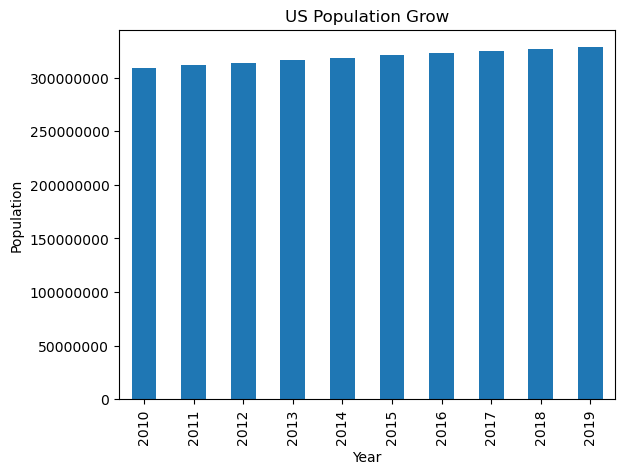

In [6]:
#Creating new data frame that only contais the US population
df_country = df_totals.xs(51)

#Selecting just the population data to be used in the plot
df_country = df_country[[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]]

#Sorting the information to beging from 2010 to 2019 and creating a line plot
df_country.sort_values().plot(kind='bar')

plt.title('US Population Grow')
plt.xlabel('Year')
plt.ylabel('Population')
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()


7. Create a pie chart showing the populations of California and rest of the U.S. in 2019

In [7]:
#Creating a new data frame that only includes the population information from 2019 
df_2019 = df_totals[['State', 2019]]

#Finding the population data from california and the rest of the country
ca_df = df_2019.loc[df_2019['State']== 'California']
us_df = df_2019.loc[df_2019['State'] == 'United States']

#Placing the population of california and the US in a variable to be used in plot
ca_pop = ca_df.iloc[0,1]
res_pop = us_df.iloc[0,1]
#Substracts the population of california out of the US population to no double count it
res_pop = res_pop - ca_pop

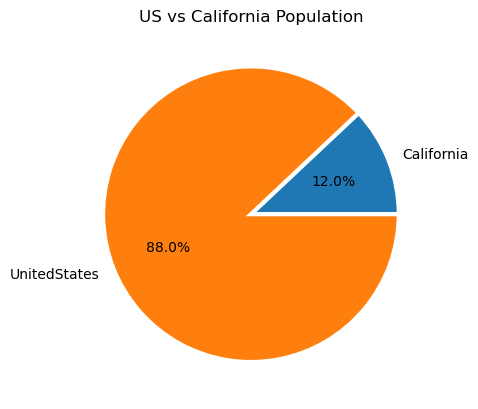

In [8]:
#Placing the California and US variables into a list to use in the plt.pie function
us_pop = [ca_pop,res_pop]
names = 'California', 'UnitedStates'
#Creating pie plot
plt.pie(us_pop, labels= names, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.title('US vs California Population')
plt.show()